# Mushroom dataset - Classification

In order to identify Poisonous mushrooms, this work proposes to expose some statistical approaches in the analysis of the studied variables and the use of the Random Forest Model to classify whether a particular mushroom can be harmful to health or not.

The dataset consists of 22 variables that characterize the mushrooms of the Agaricaceae and Lepiota family, classifying them as edible (e - edible) or poisonous (p - poisonous). We have a total of 8124 observations.

- class : (classes: edible=e, poisonous=p)
- cap-shape : bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface : fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color : brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises : bruises=t,no=f
- odor : almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment : attached=a,descending=d,free=f,notched=n
- gill-spacing : enlarging=e,tapering=t
- gill-size : bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- gill-color : fibrous=f,scaly=y,silky=k,smooth=s
- stalk-shape : enlarging=e,tapering=t
- stalk-root : bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring : fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring : fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring : brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring : brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type : partial=p,universal=u
- veil-color : brown=n,orange=o,white=w,yellow=y
- ring-number : none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color : black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population : abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat : grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Importing the data

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv(r'C:\Users\User\Desktop\Projects\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [3]:
df.shape

(8124, 23)

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There is no numerical variable in the dataset 

In [6]:
df.describe(include=['O'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null value's

# EDA

### Vizualizing the Variable's

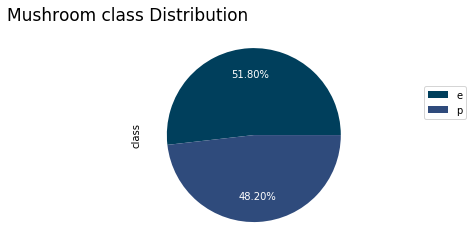

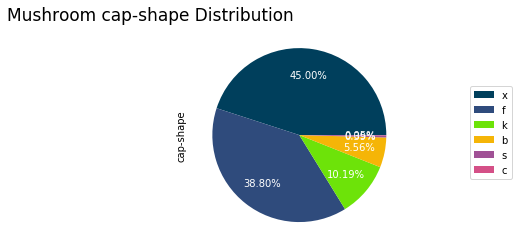

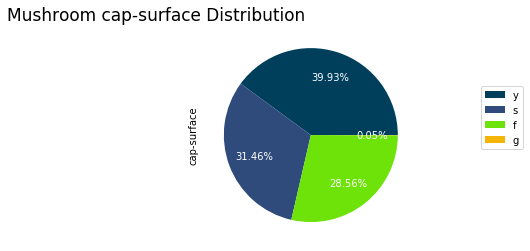

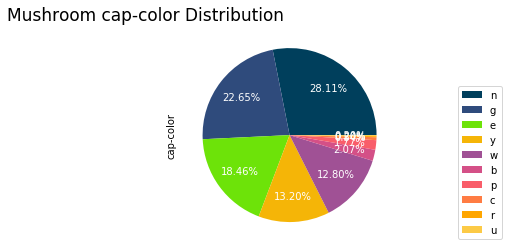

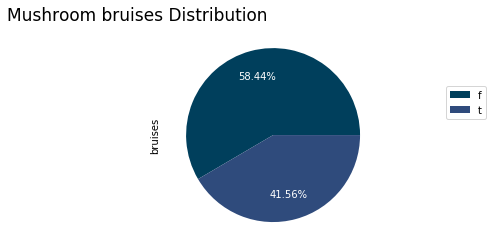

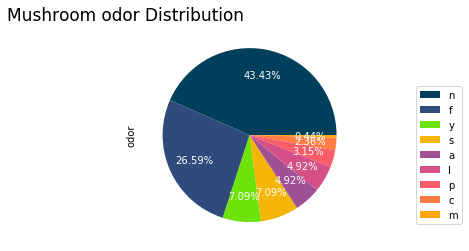

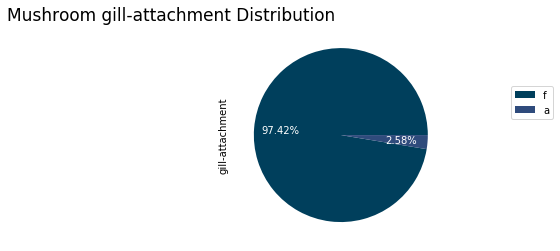

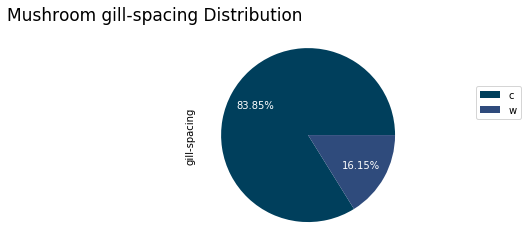

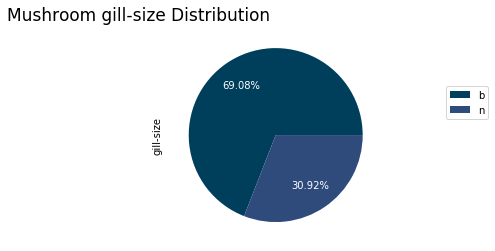

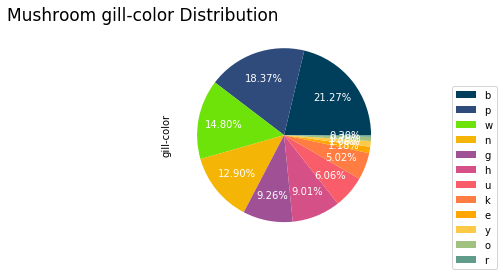

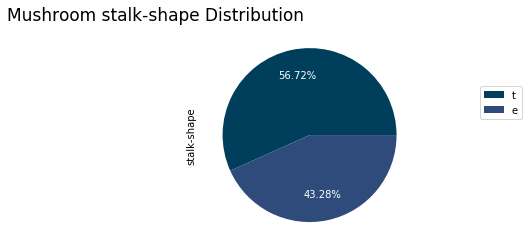

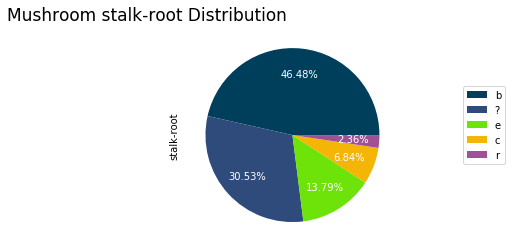

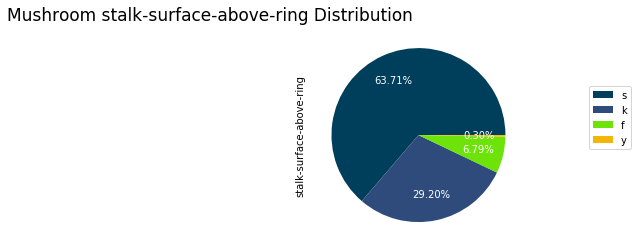

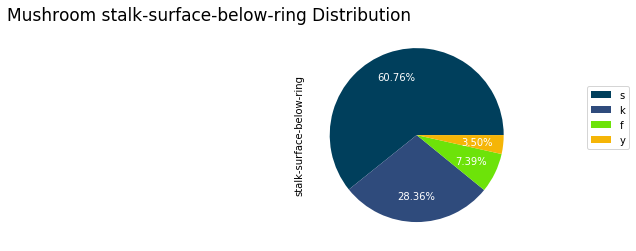

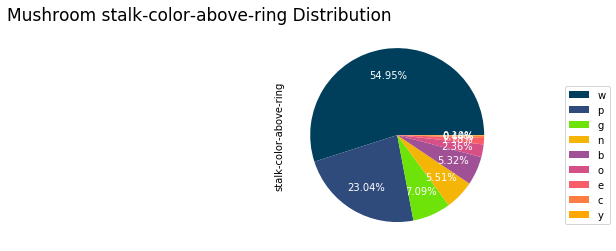

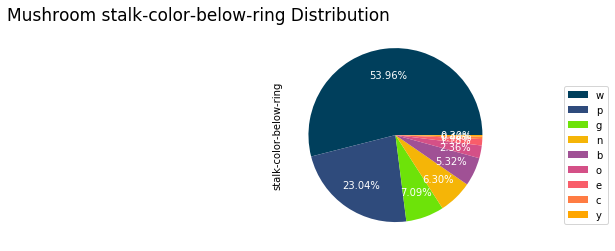

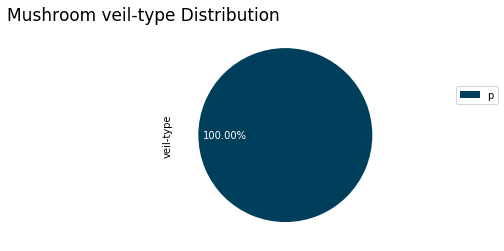

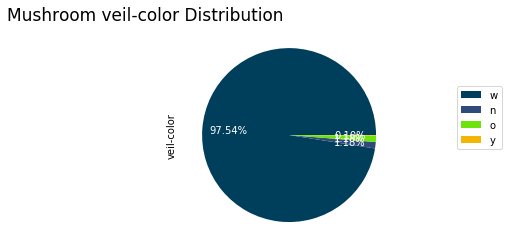

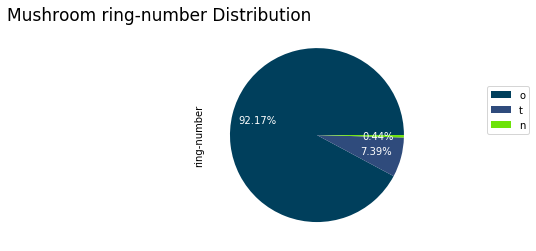

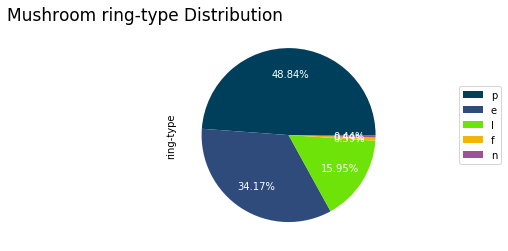

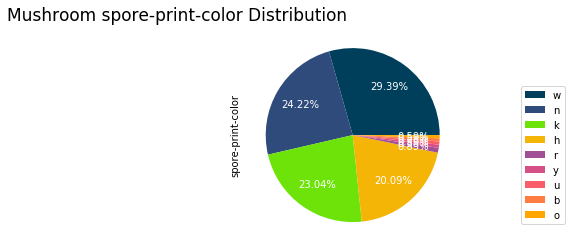

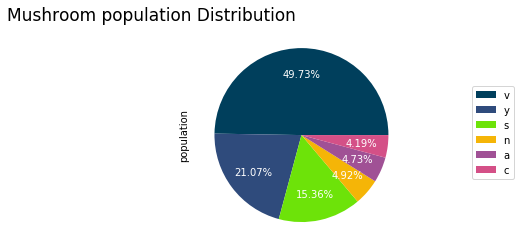

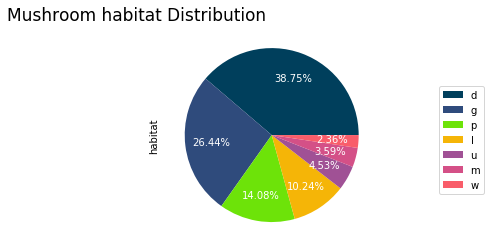

In [8]:
import matplotlib.pyplot as plt

colors= ['#003f5c','#2f4b7c','#6de309','#f5b507','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#fcca46','#a1c181','#619b8a','#15e8aa']
for i in df.columns:
    plt.figure()
    df[i].value_counts().plot.pie(textprops={'color':"w"},pctdistance=0.7,autopct='%.2f%%',colors=colors, figsize=(5,5),labels=None,subplots=True)
    plt.title("Mushroom {} Distribution ".format(i),fontsize=17,ha='right')
    plt.legend(labels=df[i].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
    plt.show()

### Correlating Variable's

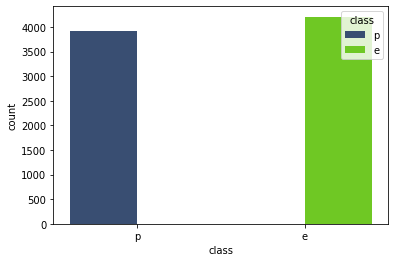

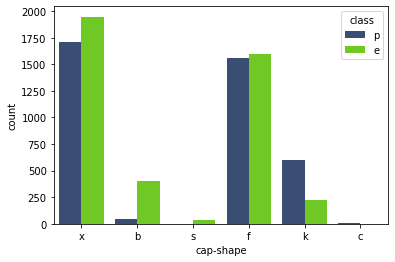

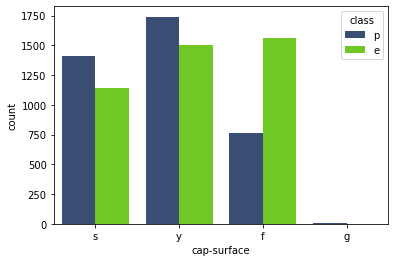

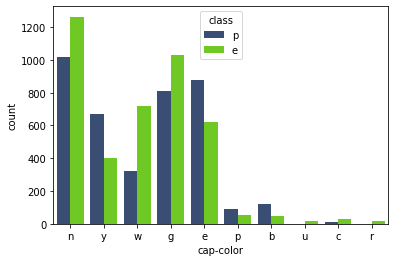

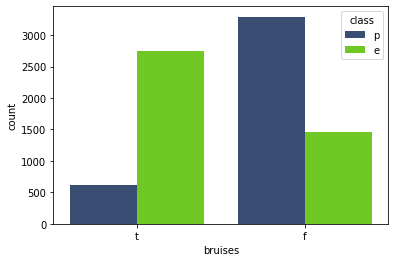

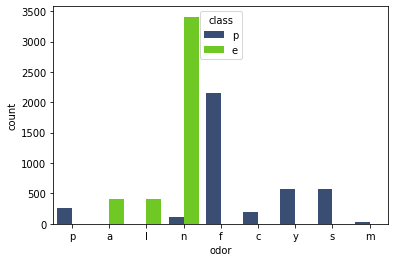

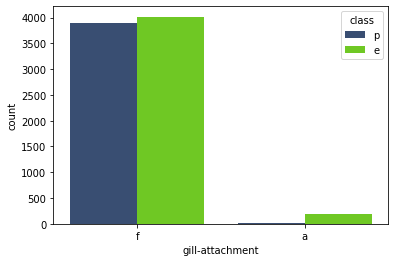

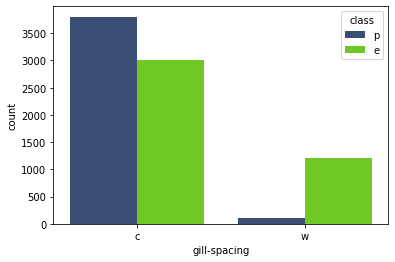

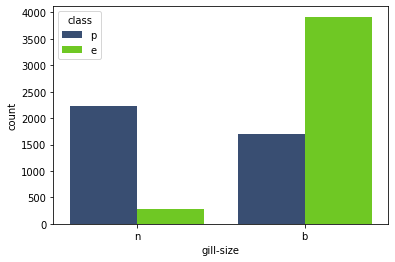

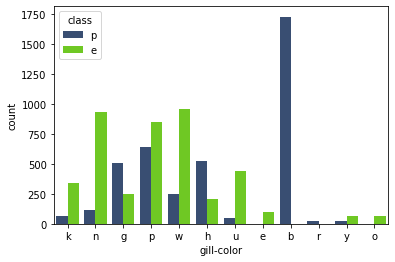

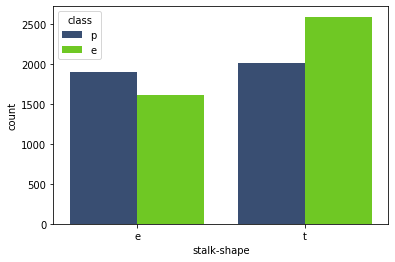

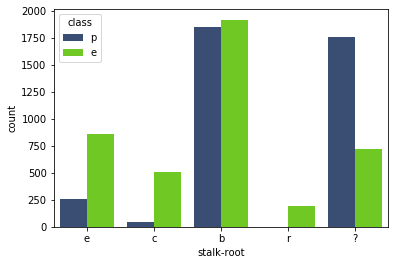

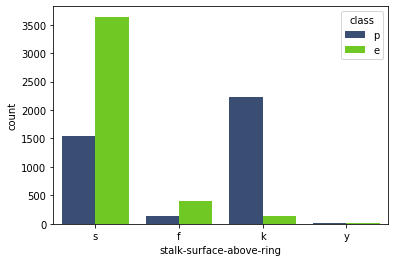

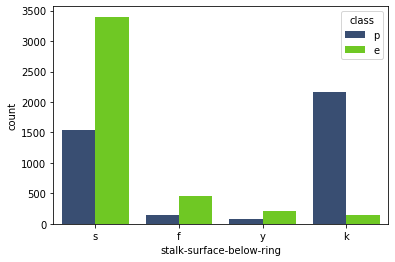

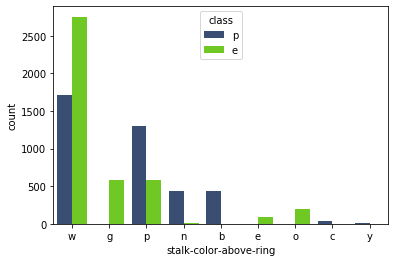

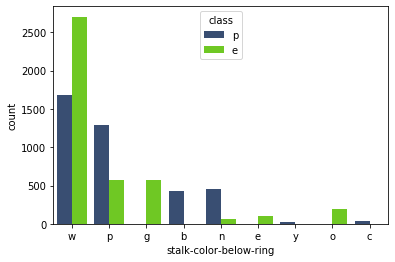

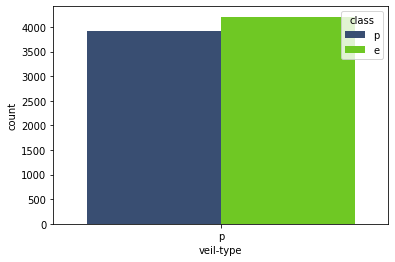

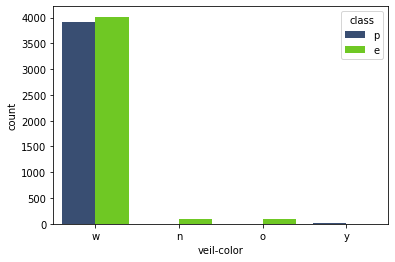

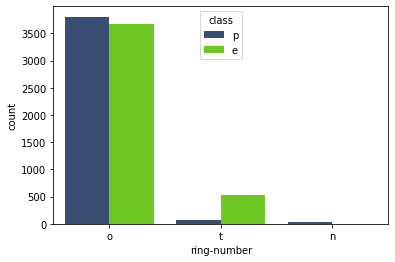

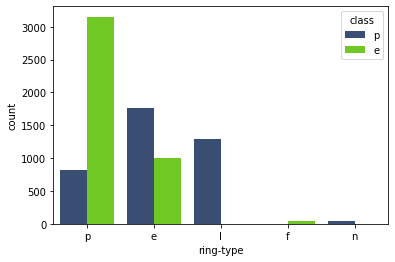

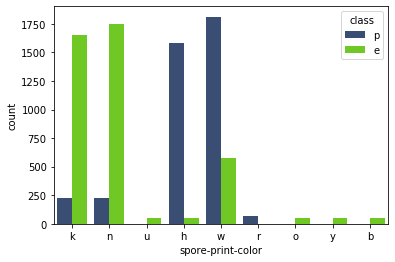

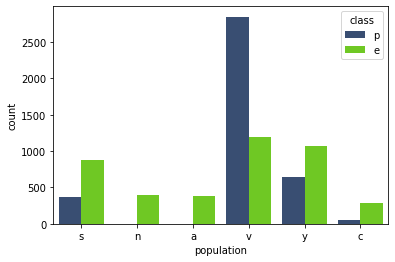

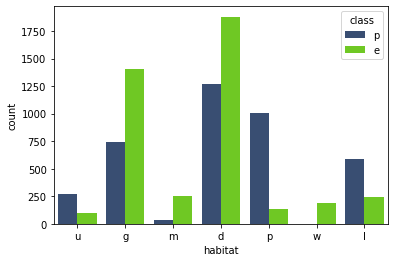

In [9]:
import seaborn as sns

for i in df.columns:
    sns.countplot(x=i, hue="class", data=df, palette =['#2f4b7c','#6de309'])
    plt.show()

The largest spore-print-color categories for poison mushrooms (Poisonous) are chocolate (chocolate) and white (white), implying that the highest frequency of poisonous mushrooms contains that coloring. Edible mushrooms (Edible) are mostly black (black) and brown (brown) in their spores, but even so there is a small existence of edible mushrooms that contain the coloration of chocolate and white spores.

Regarding the odor of the mushroom, we see that the essential characteristic of a poisonous mushroom is that it has an unpleasant (fetid) odor, being referred to by foul. Edible mushrooms tend to have no smell at all.

### Mapping categorical variables to numerical values 

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  df[col] = le.fit_transform(df[col])

df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Splitting the data

In [11]:
x = df.drop(columns=['class'])
y = df[['class']]

In [12]:
x.shape, y.shape

((8124, 22), (8124, 1))

### Checking for variable importance

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.0039044  0.01879863 0.0123997  0.08156187 0.12282595 0.00611851
 0.07516684 0.13859682 0.04975407 0.04376704 0.05381872 0.05541104
 0.04533395 0.01639986 0.01943436 0.         0.00532951 0.0182763
 0.09557798 0.0603477  0.04445361 0.03272313]


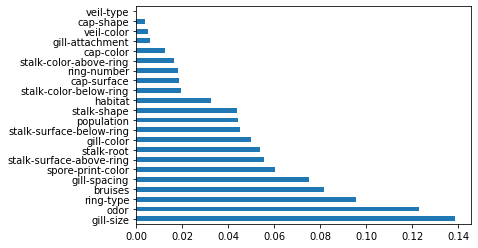

In [14]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(model.feature_importances_,index =x.columns)
feat_importances.nlargest(22).plot(kind="barh")
plt.show()

### Dropping the columns based on importance

In [15]:
df.drop(['veil-type','veil-color','cap-shape'],axis=1,inplace=True)

### Splitting Again

In [16]:
x = df.drop(columns=['class'])
y = df[['class']]

In [17]:
x.shape, y.shape

((8124, 19), (8124, 1))

# Model building

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=47)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)
log = accuracy_score(test_y,pred)*100

print('accuracy score:', log)
print('\n')
print (confusion_matrix(test_y,pred))
print('\n')
print (classification_report(test_y,pred))

accuracy score: 93.90380313199105


[[864  49]
 [ 60 815]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       913
           1       0.94      0.93      0.94       875

    accuracy                           0.94      1788
   macro avg       0.94      0.94      0.94      1788
weighted avg       0.94      0.94      0.94      1788



#### ROC Curve

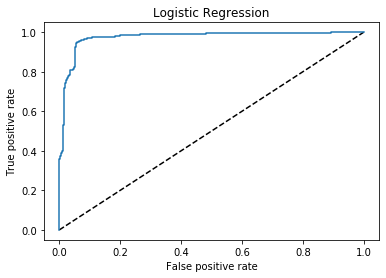

0.9388796745423252

In [22]:
y_pred_prob = lg.predict_proba(test_x)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score = roc_auc_score(test_y,lg.predict(test_x))
auc_score

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
predgnb= gnb.predict(test_x)
gaussian = accuracy_score(test_y,predgnb)*100

print('accuracy score:',gaussian)
print('\n')
print(confusion_matrix(test_y, predgnb))
print('\n')
print(classification_report(test_y, predgnb))

accuracy score: 91.66666666666666


[[870  43]
 [106 769]]


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       913
           1       0.95      0.88      0.91       875

    accuracy                           0.92      1788
   macro avg       0.92      0.92      0.92      1788
weighted avg       0.92      0.92      0.92      1788



#### ROC Curve

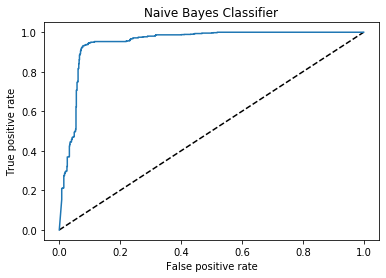

0.9158798310123613

In [24]:
y_pred_prob = gnb.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Naive Bayes Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Naive Bayes Classifier')
plt.show()

auc_score = roc_auc_score(test_y,gnb.predict(test_x))
auc_score

## SVM - GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
from sklearn.svm import SVC
from sklearn import svm, datasets

parameters = {'kernel':['poly','rbf'],'C':[1,5,10,15]}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'C': 5, 'kernel': 'poly'}


In [27]:
svc=SVC(kernel='poly', C=5, probability=True)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
svcs = accuracy_score(test_y, predsvc)*100

print('accuracy score:',svcs)
print('\n')
print(confusion_matrix(test_y, predsvc))
print('\n')
print(classification_report(test_y, predsvc))

accuracy score: 98.88143176733782


[[913   0]
 [ 20 855]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       913
           1       1.00      0.98      0.99       875

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



#### ROC Curve

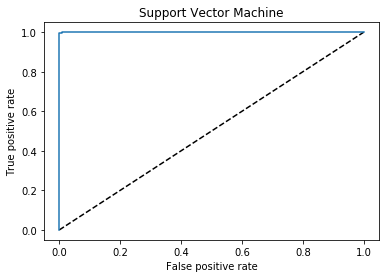

0.9885714285714285

In [28]:
y_pred_prob = svc.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Machine')
plt.show()

auc_score = roc_auc_score(test_y,svc.predict(test_x))
auc_score

## Decision Tree - GridSearchCV

In [29]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini','entropy']}
dtc =DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'gini'}


In [30]:
dtc =DecisionTreeClassifier(criterion='gini')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
decision_e = accuracy_score(test_y, preddtc)*100

print('accuracy score:',decision_e )
print('\n')
print(confusion_matrix(test_y, preddtc))
print('\n')
print(classification_report(test_y, preddtc))

accuracy score: 100.0


[[913   0]
 [  0 875]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       875

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



#### ROC Curve

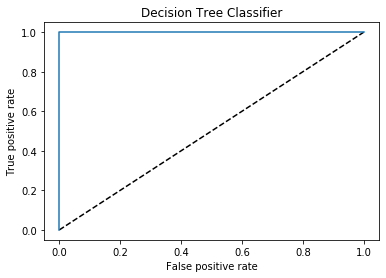

1.0

In [31]:
# Decision tree curve
y_pred_prob = dtc.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score = roc_auc_score(test_y,dtc.predict(test_x))
auc_score

## Random Forest - GridSearchCV

In [32]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [100,300,500],'random_state': [40,45,50,55,60,65,70,75]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_estimators': 100, 'random_state': 40}


In [33]:
rf = RandomForestClassifier(n_estimators=100,random_state=40) 
rf.fit(train_x,train_y)
predrf = rf.predict(test_x)
random = accuracy_score(test_y,predrf)*100

print('accuracy score:',random)
print('\n')
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

accuracy score: 100.0


[[913   0]
 [  0 875]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       875

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



#### ROC Curve

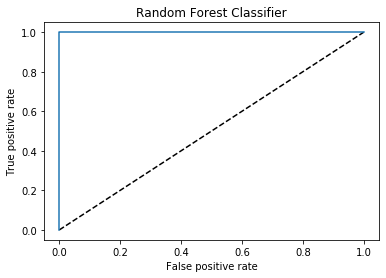

1.0

In [34]:
y_pred_prob = rf.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score = roc_auc_score(test_y,rf.predict(test_x))
auc_score

## KNN - GridSearchCV

In [35]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [5,10,15,20,25,30]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'n_neighbors': 5}


In [36]:
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn = knn.predict(test_x)
knn_a = accuracy_score(test_y, predknn)*100

print('accuracy score:',knn_a)
print('\n')
print(confusion_matrix(test_y, predknn))
print('\n')
print(classification_report(test_y, predknn))

accuracy score: 99.9440715883669


[[913   0]
 [  1 874]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       875

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



#### ROC Curve

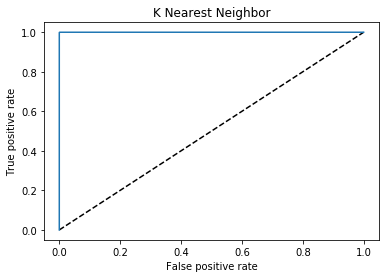

0.9994285714285714

In [37]:
y_pred_prob = knn.predict_proba(test_x)[:,0]
tpr,fpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='K Nearest Neighbor')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('K Nearest Neighbor')
plt.show()

auc_score = roc_auc_score(test_y,knn.predict(test_x))
auc_score

## Picking the best model

In [38]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', ' Gaussian Naive Bayes',
              'Decision Tree'],
    'Score': [svcs,knn_a,log,random,gaussian,decision_e]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.000000
5,Decision Tree,100.000000
1,KNN,99.944072
0,Support Vector Machines,98.881432
2,Logistic Regression,93.903803
4,Gaussian Naive Bayes,91.666667


## Saving the best model

In [39]:
import pickle

filename = 'mushroom_pred.pkl'
pickle.dump(random, open(filename, 'wb'))